In [15]:
import sys
sys.path.append("../Pupillengröße/Skripte/")
#%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging as log
import checkdata
import importlib
from IPython.display import display
def display_all(df):
    from IPython.display import HTML, display
    IPython.display(IPython.HTML(df.to_html()))


In [16]:
import preprocessing
import plotting
import math
import os

importlib.reload(preprocessing)
importlib.reload(plotting)
importlib.reload(checkdata)


<module 'checkdata' from '/Users/Katharina/Desktop/Pupille/notebooks/checkdata.py'>

In [38]:

import preprocessing
import plotting
import math
import os

importlib.reload(preprocessing)
importlib.reload(plotting)
#importlib.reload(checkdata)

def plot(df,text,xcol,ycol):
    plotting.plot_preprocessed(df,text,xcol,ycol)
    
def noplot(df,text,xcol,ycol):
    pass


if os.getlogin()=='marco':
    subject_id="PJ01_1_Ruhe"
    data_dir="/home/marco/Nextcloud/KatharinaBeispieldaten/"
else:
    subject_id="PJ01_1_Ruhe"
    data_dir="/Users/Katharina/Desktop/Beispieldaten"

field="diameter_3d"
ts="pupil_timestamp"

config=preprocessing.create_process_config(0,field,subject_id,data_dir)

# Set this to False, if you want to process the data
# Set this to True, if you only want to return an array of data checks 

#config.validate_only=True

eye0=preprocessing.process(config,display)
# display(eye0)

if False:
    if config.validate_only:
        # no data, just a structure containing annotation indices and error estimates
        display(eye0) 
    else:
        for what_pf in eye0.frames:
            if what_pf.valid:
                what=what_pf.data
                ts=what['pupil_timestamp'].iloc[0]
                plot(what,f"frame @{ts}","pupil_timestamp_based",f"{field}_original")
                plot(what,f"gated @{ts}","pupil_timestamp_based",f"{field}_gated")
                plot(what,f"recon @{ts}","pupil_timestamp_based",f"{field}_rec")
                plot(what,f"interp @{ts}","pupil_timestamp_based",f"{field}_rec_interp_100")

        if True:
            for what_pf in eye0.frames:
                if what_pf.valid:
                    what=what_pf.data
                plotting.plot_preprocessed(what,f"frame @what.pupil_timestamp[0]","pupil_timestamp_based",f"{field}_gated")





'Starting process2'

'Loop through each annotation timestamp and slice the data'

'Label the data'

'preprocess and slice data'

'nanp before=50.11374715632109, nanp after=0.016249593760155997'

'nanp before=50.06578947368421, nanp after=0.7072368421052632'

'nanp before=50.298769771528995, nanp after=0.01757469244288225'

'nanp before=50.42076991942704, nanp after=0.017905102954341987'

'nanp before=50.97066436583261, nanp after=0.021570319240724764'

'nanp before=50.46254307999274, nanp after=0.0'

'nanp before=50.62392013822231, nanp after=0.0'

'nanp before=51.34029986369832, nanp after=0.02271694684234439'

'nanp before=50.55653192735794, nanp after=0.019527436047646944'

'nanp before=50.21645021645022, nanp after=0.021645021645021644'

'nanp before=50.516468524654066, nanp after=1.929448450594426'

'nanp before=50.86424957841484, nanp after=0.021079258010118045'

'nanp before=50.79522862823062, nanp after=0.019880715705765408'

'nanp before=50.484549277747305, nanp after=0.0'

'nanp before=50.554151273575734, nanp after=0.019443904335990667'

'nanp before=50.74166827200925, nanp after=0.019264110961279137'

'nanp before=51.25373821025995, nanp after=0.0'

'nanp before=51.18300338000966, nanp after=0.024142926122646065'

'nanp before=53.09707241910632, nanp after=0.030816640986132512'

'nanp before=51.71957671957672, nanp after=0.0'

'nanp before=51.05204872646733, nanp after=0.0'

'nanp before=50.66550294566878, nanp after=0.02181976871045167'

'nanp before=50.34753163428979, nanp after=1.3544822669755836'

'nanp before=50.764406115248924, nanp after=0.01960015680125441'

'nanp before=51.20734908136483, nanp after=0.07874015748031496'

'nanp before=51.12395632626846, nanp after=0.021408691928923144'

'nanp before=50.87546724375369, nanp after=0.01967342120794806'

'nanp before=50.44809559372666, nanp after=0.0'

'nanp before=50.93409977417368, nanp after=0.020529665366454525'

'nanp before=51.076999257241894, nanp after=0.02475860361475613'

'nanp before=53.946102021174205, nanp after=0.0'

'nanp before=55.96745027124774, nanp after=0.09041591320072333'

'nanp before=53.756933938477054, nanp after=0.10085728693898134'

'nanp before=54.32862190812721, nanp after=0.35335689045936397'

'nanp before=52.483501215699896, nanp after=0.0'

'nanp before=54.152599594868335, nanp after=0.0675219446320054'

'nanp before=50.35494557501183, nanp after=0.015775358889414733'

'nanp before=50.17405781746633, nanp after=0.015135462388375966'

'nanp before=50.21380574221136, nanp after=0.015271838729383017'

'nanp before=50.861318949016876, nanp after=0.017400382808421787'

'nanp before=51.2998266897747, nanp after=0.01575547502757208'

'Anzahl der Messungen: 41'

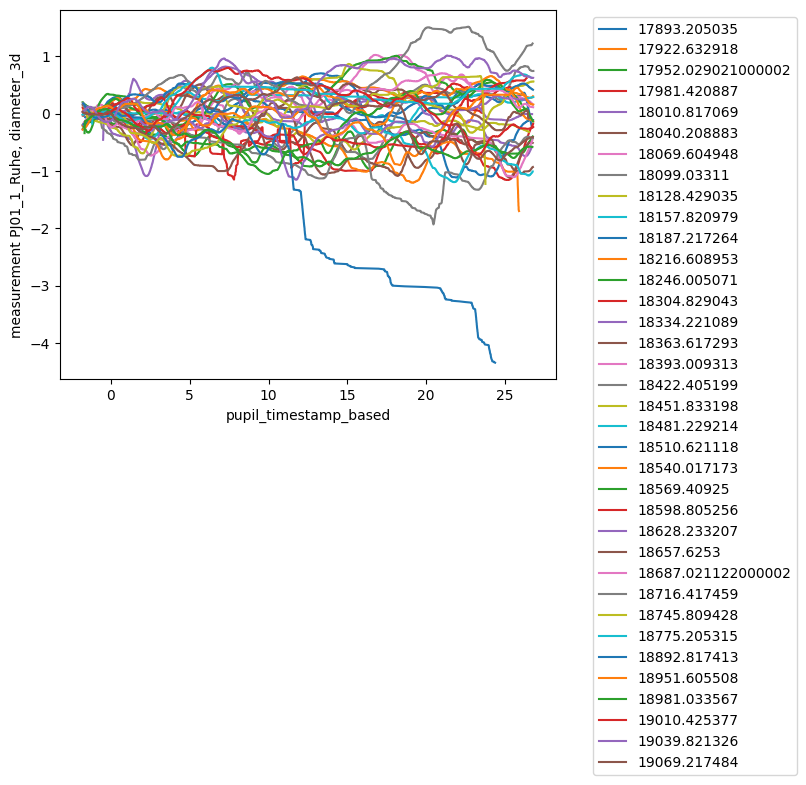

In [39]:
display(f"Anzahl der Messungen: {len(eye0.frames)}")
sub=None
i=0
for what_pf in eye0.frames:
    #display(what_pf)
    if what_pf.valid:
        what=what_pf.data
        ts=what_pf.annotation_ts
        # ts=what['pupil_timestamp'].iloc[0]
        # preprocessing.create_baseline_column(what, f'{field}_original',f'{field}_original_baseline')
        sub=what.plot(ax=sub, x='pupil_timestamp_based', y=f'{field}_baseline', ylabel='baseline adjusted pupil size', kind='line',label=ts)
        sub.set_ylabel(f'measurement {subject_id}, {field}')
         # Adjust the position of the legend
        legend = sub.legend()
        legend.set_bbox_to_anchor((1.5, 1))  # Adjust the position of the legend box

[(0, 4.499689755553091, 17893.205035, 0.008622880852491839, 'finished', ''),
 (1, 4.624831286603808, 17922.632918, 0.15310234759413544, 'finished', ''),
 (2,
  4.878506747178779,
  17952.029021000002,
  0.44597790186923125,
  'finished',
  ''),
 (3, 4.8322639504898275, 17981.420887, 0.39258927420768946, 'finished', ''),
 (4, 4.447037764838638, 18010.817069, -0.0521653441071921, 'finished', ''),
 (5, 4.568947080824532, 18040.208883, 0.08858243815657335, 'finished', ''),
 (6, 4.174157698553854, 18069.604948, -0.3672131634060609, 'finished', ''),
 (7, 4.047225638901719, 18099.03311, -0.5137598464854505, 'finished', ''),
 (8, 5.215153994941175, 18128.429035, 0.834646750878606, 'finished', ''),
 (9, 4.891461448583668, 18157.820979, 0.4609344741203488, 'finished', ''),
 (10, 5.228529234418223, 18187.217264, 0.8500888463281373, 'finished', ''),
 (11, 5.097020290426577, 18216.608953, 0.6982580197421229, 'finished', ''),
 (12, 4.020433139331191, 18246.005071, -0.5446925513846487, 'finished', ''

(array([1., 0., 0., 0., 3., 8., 8., 6., 6., 5.]),
 array([-3.60205756, -3.07982957, -2.55760157, -2.03537357, -1.51314558,
        -0.99091758, -0.46868958,  0.05353842,  0.57576641,  1.09799441,
         1.62022241]),
 <BarContainer object of 10 artists>)

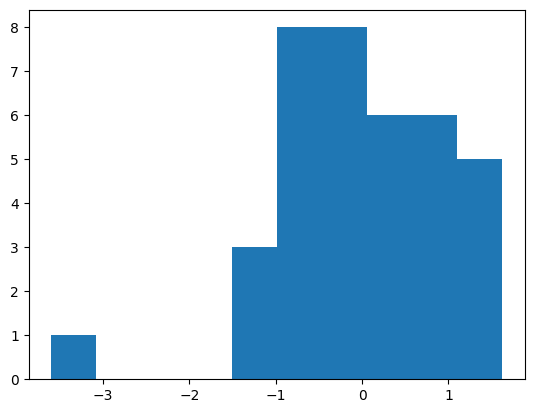

In [40]:
#display(eye0.num_valid, len(eye0.frames))
display([(f.index,f.baseline_mean,f.annotation_ts,f.zscore,f.stage,f.remark) for f in eye0.frames])


zscores=[f.zscore for f in eye0.frames if f.valid or f.stage=="zscore"]
plt.hist(zscores)

In [20]:
preprocessing.save_pickle(f"{eye0.config.subject_id}.pickle",eye0)


In [8]:
f=preprocessing.show_pickle("hello.pickle")

AttributeError: module 'preprocessing' has no attribute 'show_pickle'

In [9]:
display(len(f.frames))

NameError: name 'f' is not defined

Hallo *wie gehts*

In [8]:
#display(eye0)

ProcessResult(config=ProcessConfig(eyenum=0, column='diameter', sfactor=1, data_path='/Users/Katharina/Desktop/Beispieldaten', subject_id='PJ01_1_Ruhe', condition='3.4Placebo', timebase='3.4', stime_time_offset=0, after_var_start_offset=25.5, window_duration=29, nan_reconstruct_threshold=30, nan_before_threshold=0, nan_after_threshold=0, noise_threshold_factor=16, noise_rejection_percent=20, validate_only=False, survive_threshold=5, baseline_length=2.0), num_valid=37, frames=[ProcessFrame(index=0, baseline_mean=85.17932135486365, baseline_std=2.181970037277071, annotation_ts=17893.205035, zscore=-0.8894479810120778, valid=True, stage='finished', remark='', data=       pupil_timestamp  world_index  eye_id  confidence  norm_pos_x   
2         17891.325284            0       0    1.000000    0.244413  \
3         17891.325284            0       0    1.000000    0.244185   
6         17891.338615            0       0    0.948084    0.244391   
7         17891.338615            0       0   

In [86]:
what=eye0.frames[1].data
# display(what)
#display(preprocessing.create_baseline_column(what,"diameter","diameter_baseline2"))
#plt.plot(what.diameter_baseline2)

display(what.loc[what['label'] == 1])
# plt.plot(what.diameter)

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,projected_sphere_angle,pupil_timestamp_based,diameter_gated,label,diameter_rec,diameter_rec_interp,diameter_rec_interp_100,diameter_original,diameter_baseline,time_slot
5582,9951.075504,1873,0,0.796586,0.730027,0.446549,NaN,pye3d 0.3.0 real-time,292.010896,221.380432,...,0.0,-1.998384,16.211333,1,16.211333,16.211333,NaN,16.211333,NaN,0.0
5583,9951.075504,1873,0,0.796586,0.729985,0.446674,NaN,2d c++,291.994080,221.330345,...,NaN,-1.998384,16.192553,1,16.192553,16.192553,NaN,16.192553,NaN,0.0
5588,9951.127031,1875,0,0.685397,0.844160,0.156916,NaN,2d c++,337.663971,337.233490,...,NaN,-1.946857,24.445381,1,24.445381,24.445381,NaN,24.445381,NaN,0.0
5590,9951.147316,1876,0,0.614692,0.733933,0.450962,NaN,2d c++,293.573013,219.615242,...,NaN,-1.926572,19.988987,1,19.988987,19.988987,NaN,19.988987,NaN,0.0
5598,9951.424233,1884,0,0.641944,0.711453,0.262509,NaN,2d c++,284.581055,294.996414,...,NaN,-1.649655,NaN,1,84.132767,84.132767,NaN,84.132767,NaN,0.0
5606,9951.938037,1899,0,0.639762,0.683738,0.373712,NaN,2d c++,273.495117,250.515121,...,NaN,-1.135851,NaN,1,14.328240,14.328240,NaN,14.328240,NaN,0.0
5609,9952.052404,1903,0,0.990000,0.696997,0.381696,NaN,2d c++,278.798737,247.321754,...,NaN,-1.021484,16.455513,1,16.455513,16.455513,NaN,16.455513,NaN,0.0
5610,9952.052404,1903,0,0.990000,0.697046,0.381606,NaN,pye3d 0.3.0 real-time,278.818451,247.357431,...,0.0,-1.021484,16.458691,1,16.458691,16.458691,NaN,16.458691,NaN,0.0
5612,9952.063879,1903,0,0.990000,0.744219,0.421206,NaN,pye3d 0.3.0 real-time,297.687576,231.517610,...,0.0,-1.010009,10.757072,1,10.757072,10.757072,NaN,10.757072,NaN,0.0
5613,9952.063879,1903,0,0.990000,0.744262,0.421250,NaN,2d c++,297.704849,231.499817,...,NaN,-1.010009,10.914915,1,10.914915,10.914915,NaN,10.914915,NaN,0.0


In [102]:
# df_combined = pd.concat(df_list_eye_id_preprocessed_filtered)
pd.concat([f.data for f in eye0.frames if f.valid])

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,projected_sphere_angle,pupil_timestamp_based,diameter_gated,label,diameter_rec,diameter_rec_interp,diameter_rec_interp_100,diameter_original,diameter_baseline,time_slot
2,17891.325284,0,0,1.000000,0.244413,0.277428,NaN,2d c++,97.765274,289.028900,...,NaN,-1.879751,84.092651,1,84.092651,84.092651,NaN,84.092651,NaN,0.0
3,17891.325284,0,0,1.000000,0.244185,0.277548,NaN,pye3d 0.3.0 real-time,97.673831,288.980715,...,0.0,-1.879751,84.165691,1,84.165691,84.165691,NaN,84.165691,NaN,0.0
6,17891.338615,0,0,0.948084,0.244391,0.276874,NaN,2d c++,97.756287,289.250244,...,NaN,-1.866420,84.061066,1,84.061066,84.061066,NaN,84.061066,NaN,0.0
7,17891.338615,0,0,0.948084,0.244107,0.276982,NaN,pye3d 0.3.0 real-time,97.642880,289.207202,...,0.0,-1.866420,84.138450,1,84.138450,84.138450,NaN,84.138450,NaN,0.0
10,17891.349513,0,0,0.818940,0.244165,0.276835,NaN,pye3d 0.3.0 real-time,97.665898,289.265847,...,0.0,-1.855522,83.902596,1,83.902596,83.902596,NaN,83.902596,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363253,19096.174231,35944,0,0.717550,0.249704,0.272414,NaN,2d c++,99.881729,291.034409,...,NaN,26.956747,91.530006,3,91.530006,91.530006,NaN,91.530006,NaN,1000.0
363254,19096.174231,35944,0,0.717550,0.248984,0.272097,NaN,pye3d 0.3.0 real-time,99.593515,291.161140,...,0.0,26.956747,91.855945,3,91.855945,91.855945,NaN,91.855945,NaN,1000.0
363257,19096.181979,35945,0,0.755664,0.251960,0.271648,NaN,pye3d 0.3.0 real-time,100.783986,291.340646,...,0.0,26.964495,91.384237,3,91.384237,91.384237,NaN,91.384237,NaN,1000.0
363258,19096.181979,35945,0,0.755664,0.252559,0.272124,NaN,2d c++,101.023705,291.150375,...,NaN,26.964495,91.120499,3,91.120499,91.120499,NaN,91.120499,NaN,1000.0
